In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
# datasources
DATA_DIR = '/Users/datatron/PycharmProjects/aa228/project2/data'
SMALL = DATA_DIR + '/small.csv'
MEDIUM = DATA_DIR + '/medium.csv'
LARGE = DATA_DIR + '/large.csv'

In [4]:
# small
data = pd.read_csv(SMALL)

# rewards for a given tile
sp_r = data[['s', 'r']].drop_duplicates().sort_values('s').r.values.reshape((10, 10))

# grid is of size N x N
N = 10

# actions
LEFT = 1
RIGHT = 2
UP = 3
DOWN = 4
actions_map = {
    LEFT: 'left',
    RIGHT: 'right',
    UP: 'up',
    DOWN: 'down'
}

state_change_map = {
    0: 'same',
    10: 'up',
    -10: 'down',
    1: 'right',
    -1: 'left'
}

In [5]:
# exploring the data
t = data[data.s.apply(lambda x: len(get_valid_actions(x)) == 4)].groupby(['_a', '_sp']).agg({'sp': 'count'})
t.groupby(level=0).apply(lambda x: x/x.sum())

NameError: name 'get_valid_actions' is not defined

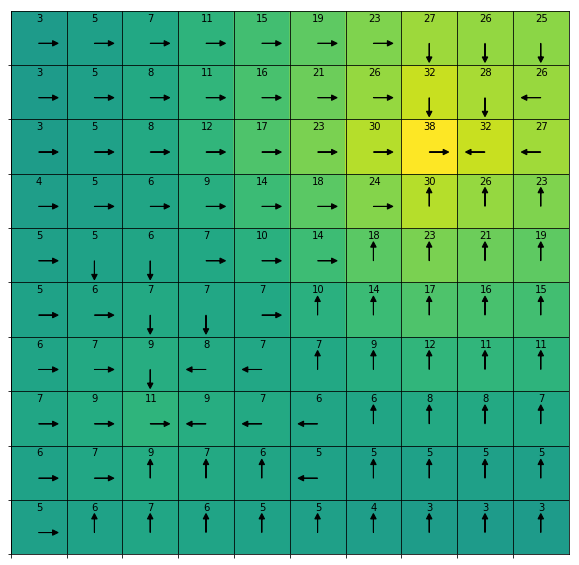

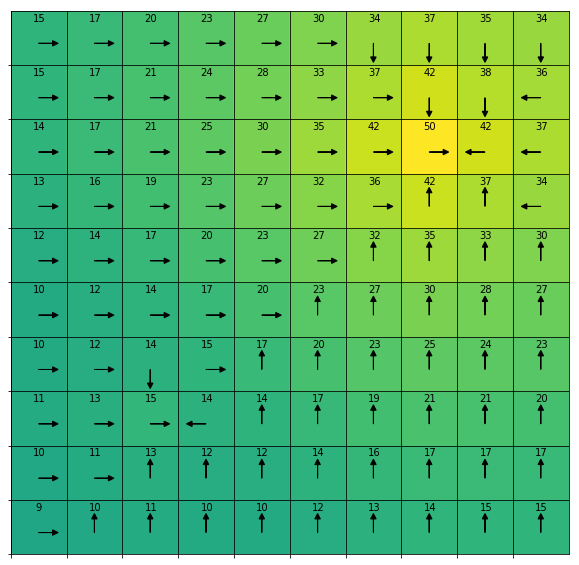

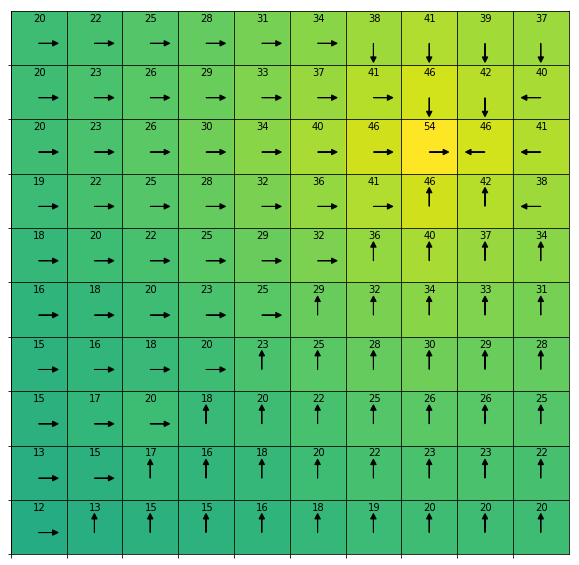

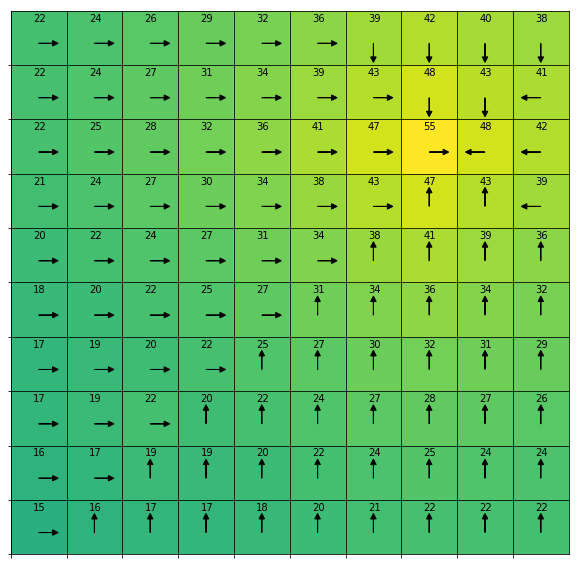

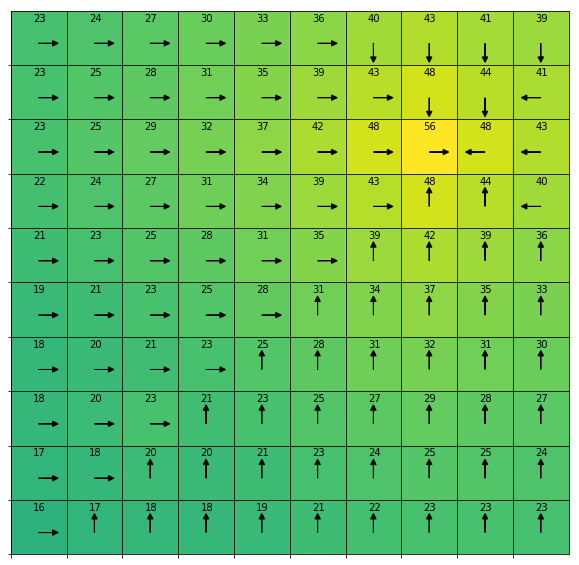

In [ ]:
def move_left(x, y):
    return x - 1, y
def move_right(x, y):
    return x + 1, y
def move_up(x, y):
    return x, y + 1
def move_down(x, y):
    return x, y - 1

ACTION_MAP = {
    move_left: 1,
    move_right: 2,
    move_up: 3,
    move_down: 4
}
    
class GridWorld(object):
    def __init__(self, N, R, discount):
        """
        Parameters
        ----------
        N : int
        side-length of the grid. i.e. grid size is N*N
        
        R: 2D N*N numpy array 
        rewards for each given state 
        
        discount : int
        discount factor
        """
        self.N = N
        self.R = R
        self.U = np.zeros((N, N))
        self.arrows = np.ones((N, N), dtype=np.int)
        self.iterations = 0
        self.discount = discount
        
    def T(self, x, y, a):
        pos = x + 1 + y * N
        valid_actions = self.get_valid_actions(pos)

        if a not in valid_actions:
            return []
        
        new_states = []
        for valid_action in valid_actions:
            if valid_action == a:
                new_states.append((0.6, *valid_action(x, y)))
            else:
                new_states.append((0.4/(len(valid_actions)-1), *valid_action(x, y)))
        return new_states
            
    def get_valid_actions(self, pos):
        actions = []
        if pos > N:
            actions.append(move_down)
        if pos % N != 1:
            actions.append(move_left)
        if pos % N != 0:
            actions.append(move_right)
        if pos < (N-1)*N:
            actions.append(move_up)
        return actions
    
    def update(self, n=1):
        for _ in range(n):
            self.iterations += 1
            
            for x in range(self.N):
                for y in range(self.N):
                    self.U[x][y] = self.R[x][y] + 0.95 * max([sum([p * self.U[x2][y2] for (p, x2, y2) in self.T(x, y, a)]) 
                                                             for a in [move_left, move_right, move_up, move_down]])
            
        self._update_policy()
    
    def _update_policy(self):
        for x in range(self.N):
            for y in range(self.N):
                scores = [sum([p * self.U[x2][y2] for (p, x2, y2) in self.T(x, y, a)]) 
                          for a in [move_left, move_right, move_up, move_down]]
                self.arrows[x][y] = scores.index(max(scores)) + 1
        
    def show(self):
        # initialize fig
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 10)   
        
        # position labels
        for i in range(self.N):
            for j in range(self.N):
                # label
                x = i + 0.5
                y = j + 0.5
                ax.text(x - 0.05*len(str(int(self.U[i][j]))), y + 0.3, int(self.U[i][j]))
                
                # draw arrows
                xp, yp = [(-0.25, 0), (0.25, 0), (0, 0.25), (0, -0.25)][int(self.arrows[i][j] - 1)]
                ax.arrow(x, y - 0.1, xp, yp, fc="k", ec="k", head_width=0.1, head_length=0.1 )
                
        ax.pcolormesh(self.U.T, cmap=plt.cm.get_cmap('viridis'), vmin=-np.max(self.U))
        
        # axes
        ax.set_ylim([0,self.N])
        ax.set_xlim([0,self.N])
        ax.set_yticks(range(self.N))
        ax.set_xticks(range(self.N))
        ax.grid(color='k')
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        
    def output_policy(self):
        with open('small.policy', 'w+') as f:
            f.writelines([str(int(x))+'\n' for x in self.arrows.T.reshape((100,))])
        
g = GridWorld(N, sp_r, 0.95)
for _ in range(5):
    g.update(10)
    g.show()
    g.output_policy()

In [7]:
# small
med_data = pd.read_csv(MEDIUM)

In [274]:
med_data['vel'] = med_data.s // 500
med_data['pos'] = med_data.s % 500 - 1
med_data['vel_p'] = med_data.sp // 500
med_data['pos_p'] = med_data.sp % 500 - 1
med_data['d_pos'] = med_data.pos - med_data.pos_p
med_data['d_vel'] = med_data.vel - med_data.vel_p

In [10]:
med_data.r.drop_duplicates().sort_values()

0          -225
372        -100
157         -25
370           0
156       99775
712       99900
369       99975
10242    100000
Name: r, dtype: int64

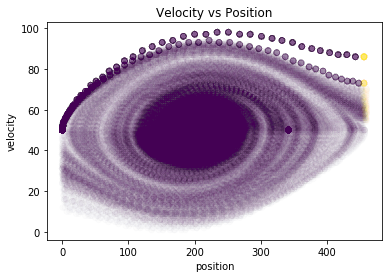

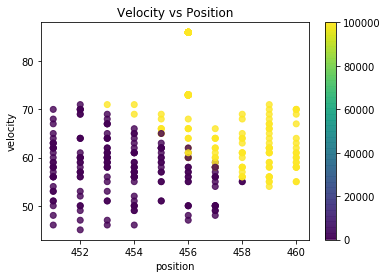

In [404]:
def plot_pos_vel(data, alpha=0.01):
    plt.scatter(data.pos, data.vel, c=data.r, cmap=plt.cm.get_cmap('viridis'), alpha=alpha)
    plt.xlabel('position')
    plt.ylabel('velocity')
    plt.title('Velocity vs Position')
    if alpha > 0.1:
        plt.colorbar()
    plt.show()

plot_pos_vel(med_data)
plot_pos_vel(med_data[med_data.pos > 450], alpha=0.8)

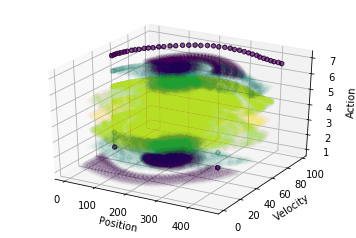

In [223]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx
filtered = med_data[med_data.r < 1000]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cNorm = matplotlib.colors.Normalize(vmin=min(filtered.r), vmax=max(filtered.r))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.cm.get_cmap('viridis'))
ax.scatter(filtered.pos, filtered.vel, filtered.a, c=scalarMap.to_rgba(filtered.r), marker='o', alpha=0.01)
scalarMap.set_array(filtered.r)

ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_zlabel('Action')

plt.show()

In [408]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

filtered = med_data[med_data.pos < 450]

trace1 = go.Scatter3d(
    x=filtered.pos,
    y=filtered.vel,
    z=filtered.a,
    mode='markers',
    marker=dict(
        size=3,
        color=filtered.r,       
        colorscale='Viridis',   
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [85]:
# rewards for medium dataset
med_data[med_data['r'] < 1000][['a', 'r']].drop_duplicates().sort_values('a')

In [411]:
R_1, R_2, R_3, R_4, R_5, R_6, R_7 = [np.zeros(50000) for _ in range(7)]
R_1.fill(-225)
R_2.fill(-100)
R_3.fill(-25)
R_4.fill(0)
R_5.fill(-25)
R_6.fill(-100)
R_7.fill(-225)
for arr in [R_1, R_2, R_3, R_4, R_5, R_6, R_7]:
    arr[[True if idx%500 + 0.3*idx//500 > 475 else False for idx in range(1, 50001)]] = 100000

In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

filtered = med_data[med_data.d_vel > -4]
filtered = filtered[filtered.pos < 200].sample(10000)
trace1 = go.Scatter3d(
    x=filtered.pos,
    y=filtered.vel,
    z=filtered.a,
    mode='markers',
    marker=dict(
        size=3,
        color=filtered.d_vel,       
        colorscale='Viridis',   
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

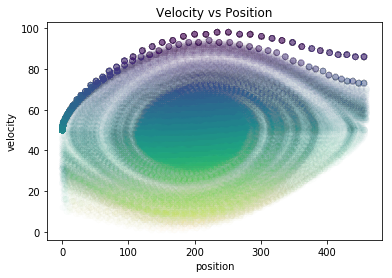

In [319]:
transition_data = med_data[med_data.d_pos < 20]
plt.scatter(transition_data.pos, transition_data.vel, c=transition_data.d_pos, cmap=plt.cm.get_cmap('viridis'), alpha=0.01)
plt.xlabel('position')
plt.ylabel('velocity')
plt.title('Velocity vs Position')
plt.show()

In [14]:
transition_data = med_data[med_data.pos > 10]
transition_data = transition_data[transition_data.d_pos < 20]
transitions = []
for a in range(1, 2):
    print('generating T_{}...'.format(a))
    subset = transition_data[transition_data.a == a].copy()
    change_in_velocity = subset.groupby(subset.pos // 10).d_vel.apply(lambda x: x.value_counts()/len(x))
    change_in_position = subset.groupby(subset.vel // 10).d_pos.apply(lambda x: x.value_counts()/len(x))
    transition_matrix = np.zeros((50000, 50000))
    for s in range(50000):
        if s % 10000 == 0:
            print('{}/50000'.format(s))
        pos = s % 500
        vel = s // 500
        
        pos_idx = pos // 10
        pos_idx = max(min(change_in_velocity.index)[0], pos_idx)
        pos_idx = min(max(change_in_velocity.index)[0], pos_idx)
        while pos_idx not in change_in_velocity:
            pos_idx += 1
        dv_table = change_in_velocity[pos_idx]
        
        vel_idx = vel // 10
        vel_idx = max(min(change_in_position.index)[0], vel_idx)
        vel_idx = min(max(change_in_position.index)[0], vel_idx)
        while vel_idx not in change_in_position:
            vel_idx += 1
        dp_table = change_in_position[vel_idx]
        
        for dp_pair in zip(dp_table.index, dp_table):
            for dv_pair in zip(dv_table.index, dv_table):
                dp, proba_dp = dp_pair
                dv, proba_dv = dv_pair
                sp = max(0, min((pos + dp) + (vel + dv) * 500, 49999))
                transition_matrix[s][sp] += proba_dp * proba_dv
                
    transitions.append(transition_matrix)
    
T_1 = transitions

generating T_1...
0/50000
10000/50000
20000/50000
30000/50000
40000/50000


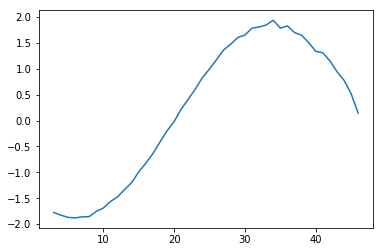

In [292]:
subset = transition_data[transition_data.a == 4]
plt.plot(subset.groupby(subset.pos % 500 // 10).d_vel.mean())

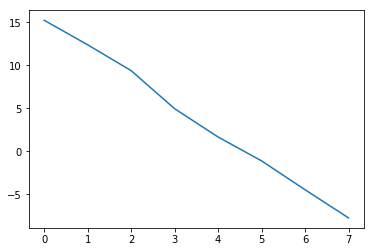

In [313]:
subset = transition_data[transition_data.a == 1]
plt.plot(subset.groupby(subset.vel // 10).d_pos.mean())

In [326]:
subset.groupby(subset.pos // 10).d_vel.mean()

pos
1    -2.500000
2    -2.000000
3    -3.000000
4    -2.000000
5    -2.000000
6    -3.000000
7    -2.000000
8    -3.000000
9    -2.000000
10   -2.918919
11   -2.152174
12   -2.080247
13   -1.933962
14   -1.807882
15   -1.483776
16   -1.508314
17   -1.243619
18   -1.043548
19   -0.835821
20   -0.570950
21   -0.509091
22   -0.188679
23   -0.021645
24    0.157143
25    0.503497
26    0.327434
27    0.724409
28    0.910995
29    0.963964
30    1.075269
31    1.089686
32    1.207101
33    1.152709
34    1.558011
35    1.220339
36    1.087248
37    1.061644
38    1.074627
39    0.972727
40    0.941176
41    0.090909
43    1.000000
44    0.000000
45    0.000000
Name: d_vel, dtype: float64

In [421]:
min(subset.groupby(subset.pos // 10).d_vel.apply(lambda x: x.value_counts()/len(x)).index)

(1, -40)

In [347]:
change_in_velocity = subset.groupby(subset.pos // 10).d_vel.apply(lambda x: x.value_counts()/len(x))
change_in_position = subset.groupby(subset.vel // 10).d_pos.apply(lambda x: x.value_counts()/len(x))

In [388]:
list(zip(change_in_position[4].index, change_in_position[4]))

[(1, 0.34498956158663885),
 (0, 0.28549060542797494),
 (2, 0.24478079331941544),
 (3, 0.10073068893528184),
 (-1, 0.017745302713987474),
 (4, 0.0062630480167014616)]

In [390]:
total = 0
for i in change_in_velocity[1].values:
    for j in change_in_position[4].values:
        total += i * j 
total

1.0000000000000002

In [358]:
min(change_in_position.index)[0]

2

In [400]:

med_data.groupby('pos').count()

,s,a,r,sp,vel,vel_p,pos_p,d_pos,d_vel
pos,,,,,,,,,
0,406,406,406,406,406,406,406,406,406
1,214,214,214,214,214,214,214,214,214
2,199,199,199,199,199,199,199,199,199
3,73,73,73,73,73,73,73,73,73
4,79,79,79,79,79,79,79,79,79
5,165,165,165,165,165,165,165,165,165
6,51,51,51,51,51,51,51,51,51
7,117,117,117,117,117,117,117,117,117
8,116,116,116,116,116,116,116,116,116


In [431]:
subset = transition_data[transition_data.a == 6].copy()
change_in_position = subset.groupby(subset.vel // 10).d_pos.apply(lambda x: x.value_counts()/len(x))

In [437]:
min(change_in_position.index[0])

2

In [ ]:
class MovingCar(object):
    def __init__(self, data):
        self.data = data
        self.R = self._make_reward_matrix()
        self.T = transitions
        
    def _make_reward_matrix(self):
        R_1, R_2, R_3, R_4, R_5, R_6, R_7 = [np.zeros(50000) for _ in range(7)]
        R_1.fill(-225)
        R_2.fill(-100)
        R_3.fill(-25)
        R_4.fill(0)
        R_5.fill(-25)
        R_6.fill(-100)
        R_7.fill(-225)
        for arr in [R_1, R_2, R_3, R_4, R_5, R_6, R_7]:
            arr[[True if idx%500 + 0.3*idx//500 > 475 else False for idx in range(1, 50001)]] = 100000
        return [R_1, R_2, R_3, R_4, R_5, R_6, R_7]
    
    def _make_transition_matrix(self):
        transition_data = self.data[self.data.pos > 10]
        transition_data = transition_data[transition_data.d_pos < 20]
        transitions = []
        for a in range(1, 8):
            print('generating T_{}...'.format(a))
            subset = transition_data[transition_data.a == a].copy()
            change_in_velocity = subset.groupby(subset.pos // 10).d_vel.apply(lambda x: x.value_counts()/len(x))
            change_in_position = subset.groupby(subset.vel // 10).d_pos.apply(lambda x: x.value_counts()/len(x))
            transition_matrix = np.zeros((50000, 50000))
            for s in range(50000):
                if s % 10000 == 0:
                    print('{}/50000'.format(s))
                pos = s % 500
                vel = s // 500
                
                if pos+0.35*vel <= 16:
                    

                pos_idx = pos // 10
                pos_idx = max(min(change_in_velocity.index)[0], pos_idx)
                pos_idx = min(max(change_in_velocity.index)[0], pos_idx)
                while pos_idx not in change_in_velocity:
                    pos_idx += 1
                dv_table = change_in_velocity[pos_idx]

                vel_idx = vel // 10
                vel_idx = max(min(change_in_position.index)[0], vel_idx)
                vel_idx = min(max(change_in_position.index)[0], vel_idx)
                while vel_idx not in change_in_position:
                    vel_idx += 1
                dp_table = change_in_position[vel_idx]

                for dp_pair in zip(dp_table.index, dp_table):
                    for dv_pair in zip(dv_table.index, dv_table):
                        dp, proba_dp = dp_pair
                        dv, proba_dv = dv_pair
                        sp = max(0, min((pos + dp) + (vel + dv) * 500, 49999))
                        transition_matrix[s][sp] += proba_dp * proba_dv

            transitions.append(transition_matrix)
        return transitions
    
    def update(self, n=1):
        for _ in range(n):
            self.iterations += 1
            
            for x in range(self.N):
                for y in range(self.N):
                    self.U[x][y] = self.R[x][y] + 0.95 * max([sum([p * self.U[x2][y2] for (p, x2, y2) in self.T(x, y, a)]) 
                                                             for a in [move_left, move_right, move_up, move_down]])
            
        self._update_policy()
    
    def _update_policy(self):
        for x in range(self.N):
            for y in range(self.N):
                scores = [sum([p * self.U[x2][y2] for (p, x2, y2) in self.T(x, y, a)]) 
                          for a in [move_left, move_right, move_up, move_down]]
                self.arrows[x][y] = scores.index(max(scores)) + 1

In [ ]:
np.maximum.reduce([T_1, T_1])

In [83]:
import numpy as np
import pandas as pd
from scipy.sparse import dok_matrix 

class MovingCar(object):
    def __init__(self, data):
        self.data = data
        self.R = self._make_reward_matrix()
        self.T = self._make_transition_matrix()
        self.U = np.zeros(50000)
        self.Q = np.zeros(50000)
        self.update_progress = []

    def _make_reward_matrix(self):
        R_1, R_2, R_3, R_4, R_5, R_6, R_7 = [np.zeros(50000) for _ in range(7)]
        R_1.fill(-225)
        R_2.fill(-100)
        R_3.fill(-25)
        R_4.fill(0)
        R_5.fill(-25)
        R_6.fill(-100)
        R_7.fill(-225)
        for arr in [R_1, R_2, R_3, R_4, R_5, R_6, R_7]:
            arr[[True if idx % 500 + 0.3 * idx // 500 > 475 else False for idx in range(1, 50001)]] = 100000
        return [R_1, R_2, R_3, R_4, R_5, R_6, R_7]

    def _make_transition_matrix(self):
        transition_data = self.data[self.data.pos > 10]
        transition_data = transition_data[transition_data.d_pos < 20]
        transitions = []
        for a in range(1, 8):
            print('generating T_{}...'.format(a))
            subset = transition_data[transition_data.a == a].copy()
            change_in_velocity = subset.groupby(subset.pos // 10, subset.vel // 10).d_vel.apply(lambda x: x.value_counts() / len(x))
            change_in_position = subset.groupby(subset.vel // 10, subset.vel // 10).d_pos.apply(lambda x: x.value_counts() / len(x))
            transition_matrix = dok_matrix((50000, 50000))
            for s in range(50000):
                # absorbing state
                if s % 500 + 0.3 * s // 500 > 475:
                    continue
                    
                pos = s % 500
                vel = s // 500

                pos_idx = pos // 10
                pos_idx = max(min(change_in_velocity.index)[0], pos_idx)
                pos_idx = min(max(change_in_velocity.index)[0], pos_idx)
                while pos_idx not in change_in_velocity:
                    pos_idx += 1
                dv_table = change_in_velocity[pos_idx]

                vel_idx = vel // 10
                vel_idx = max(min(change_in_position.index)[0], vel_idx)
                vel_idx = min(max(change_in_position.index)[0], vel_idx)
                while vel_idx not in change_in_position:
                    vel_idx += 1
                dp_table = change_in_position[vel_idx]

                for dp_pair in zip(dp_table.index, dp_table):
                    if pos+0.35*vel <= 16:
                        dp, proba_dp = 0, 1
                        dv, proba_dv = 50, 1
                        
                    for dv_pair in zip(dv_table.index, dv_table):
                        dp, proba_dp = dp_pair
                        dv, proba_dv = dv_pair
                            
                        sp = max(0, min((pos + dp) + (vel + dv) * 500, 49999))
                        transition_matrix[s,sp] += proba_dp * proba_dv

            transitions.append(transition_matrix.tocsr())
        return transitions

    def value_iteration(self, ep=0.1):
        start = time.time()
        while True:
            Up = np.maximum.reduce([self.R[i] + self.T[i].dot(self.U) for i in range(7)])
            diff = (Up - self.U).max()
            self.update_progress.append(diff)
            self.U = Up
            if diff < ep:
                logging.info('Converged after {} iterations in {}s'.format(len(self.update_progress), time.time() - start))
        
        self._update_policy()

    def _update_policy(self):
        self.Q = np.argmax(np.vstack([mc.R[i] + mc.T[i].dot(mc.U) for i in range(7)]), axis=0) + 1


In [51]:
med_data = pd.read_csv('data/medium.csv')
med_data['vel'] = med_data.s // 500
med_data['pos'] = med_data.s % 500 - 1
med_data['vel_p'] = med_data.sp // 500
med_data['pos_p'] = med_data.sp % 500 - 1
med_data['d_pos'] = med_data.pos - med_data.pos_p
med_data['d_vel'] = med_data.vel - med_data.vel_p
mc = MovingCar(med_data)

generating T_1...
generating T_2...
generating T_3...
generating T_4...
generating T_5...
generating T_6...
generating T_7...


In [90]:
# temp_U = np.copy(mc.U)
# scores = []
for _ in range(1000):
    Up = np.maximum.reduce([mc.R[i] + mc.T[i].dot(temp_U) for i in range(7)])
    scores.append((Up - temp_U).max())
    temp_U = Up
scores[-1]

17.004571892437525

In [91]:
mc.U = Up

In [95]:
mc.Q = np.argmax(np.hstack([mc.R[i] + mc.T[i].dot(mc.U) for i in range(7)])) + 1

In [111]:
Q = np.argmax(np.vstack([mc.R[i] + mc.T[i].dot(mc.U) for i in range(7)]), axis=0) + 1

In [112]:
pd.Series(Q.tolist()).value_counts()

4    20783
5     6639
1     6405
3     4905
6     4790
2     3319
7     3159
dtype: int64

In [114]:
large = m

array([4, 4, 4, ..., 1, 1, 4])

In [123]:
transition_data = med_data[med_data.d_pos < 20]
transition_data = transition_data[transition_data.d_vel < -3]

In [155]:
def plot_d_vel(data, alpha=0.1):
    plt.scatter(data.pos+0.35*data.vel, data.vel, c=data.d_vel, cmap=plt.cm.get_cmap('viridis'), alpha=alpha)
    plt.xlabel('position')
    plt.ylabel('velocity')
    plt.title('Velocity vs Position')
    if alpha > 0.1:
        plt.colorbar()
    plt.show()

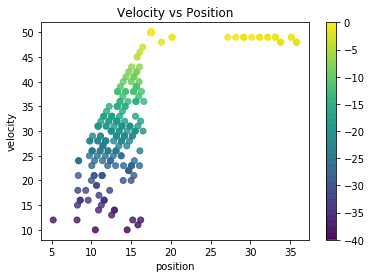

In [156]:
plot_d_vel(med_data[(med_data.vel_p == 50) & (med_data.pos < 20)], alpha=0.8)

In [307]:
large_data = pd.read_csv('data/large.csv')

In [185]:
large_data['d_s'] = large_data.sp - large_data.s

In [204]:
large_data.groupby(['s', 'r'])

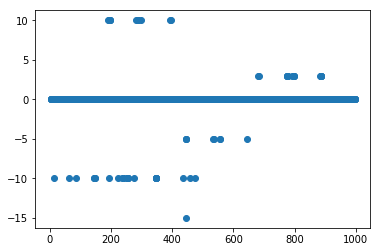

In [259]:
subset = large_data[large_data.s < 13500]
plt.scatter(subset.s % 1000, subset.r)

In [261]:
large_data['s_1000'] = large_data.s // 1000

In [304]:
no_states = 10101010
no_actions = 125
Q = np.zeros((no_states, no_actions))
for 

In [310]:
for row in large_data[:100].iterrows():
    s, a, r, sp = row[1]
    Q[s-1,a-1] = Q[s-1,a-1] + 0.1(r + 0.95*Q[sp-1][a-1] - Q[s-1, a-1])

0
1
2
3
4
5
6
7
8
9


In [312]:
large_data.s.sort_values()

153279          13
415139          16
273283          17
153280          17
415138          21
415140          26
415137          27
786356          44
786357          55
16946           65
234268          67
153281         115
495292         137
963271         147
623399         147
786355         147
133367         152
86015          156
133366         157
545249         157
963259         163
545250         164
923750         165
133368         166
234269         166
417261         167
307413         173
923751         177
439021         185
181671         191
            ...   
765185     9999726
903138     9999733
653904     9999737
922301     9999740
922300     9999740
566519     9999746
947629     9999747
390816     9999747
99302      9999753
340797     9999757
530562     9999786
701715     9999815
701716     9999817
994674     9999817
653907     9999823
710312     9999827
240655     9999836
653908     9999837
390824     9999847
390815     9999847
564122     9999855
480167     9

In [316]:
np.argmax([[1,2,3],[2,3,4]], axis=0)

array([1, 1, 1])

In [332]:
Q = np.zeros((5, 10))

In [333]:
def randargmax(b,**kw):
  """ a random tie-breaking argmax"""
  return np.argmax(np.random.random(b.shape) * (b==b.max()), **kw)

In [336]:
randargmax(Q, axis=1)

array([0, 8, 2, 3, 9])